In [ ]:
import pandas as pd

full_df = pd.read_feather('../data/data.feather')

In [ ]:
q_df = full_df.filter(regex='^q\d+')
dummies_df = pd.get_dummies(q_df, dummy_na=True)
dummies_df.shape

(68371, 9879)

In [3]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
latent_features = svd.fit_transform(dummies_df)

<Axes: >

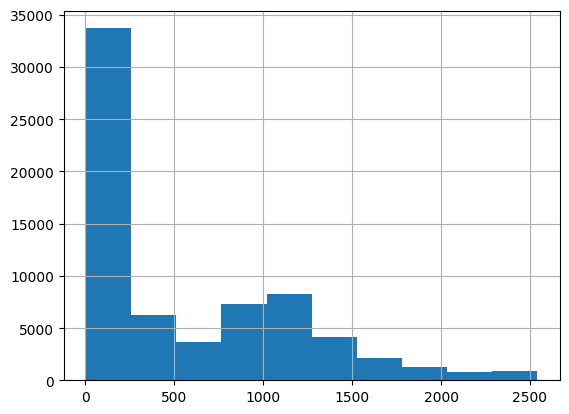

In [ ]:
n_answered = full_df.filter(regex="^q\d+").notna().sum(axis=1)
n_answered.hist

In [22]:
n_answered[n_answered>2000]

1310     2256
1779     2420
3666     2463
8470     2009
10234    2535
         ... 
67481    2059
67645    2320
67815    2265
67843    2054
67874    2282
Length: 1775, dtype: int64

In [24]:
(n_answered>2000).sum()

1775

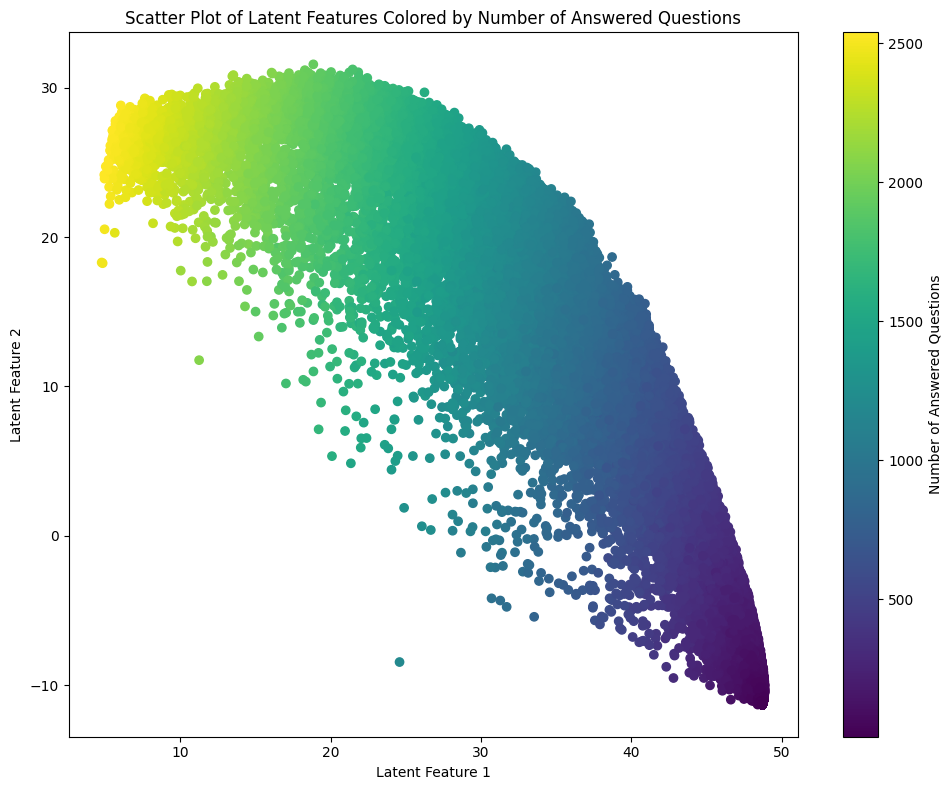

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_features[:, 0], latent_features[:, 1], c=n_answered, cmap='viridis')
cbar = plt.colorbar(scatter)
cbar.set_label('Number of Answered Questions')
plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.title('Scatter Plot of Latent Features Colored by Number of Answered Questions')
plt.tight_layout()
plt.show()

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(latent_features)

silhouette_avg_latent = silhouette_score(latent_features, cluster_labels)
sample_silhouette_values_latent = silhouette_samples(latent_features, cluster_labels)

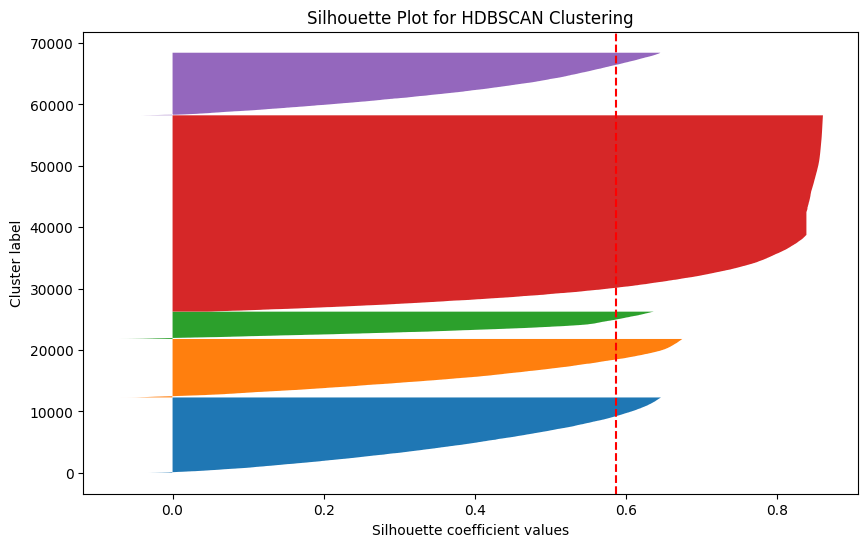

In [5]:
import numpy as np

# silhouette chart plot
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(max(cluster_labels) + 1):
    ith_cluster_silhouette_values = sample_silhouette_values_latent[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    y_lower = y_upper + 10

plt.title("Silhouette Plot for HDBSCAN Clustering")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.axvline(x=silhouette_avg_latent, color="red", linestyle="--")
plt.show()